In [1]:
import math
import numpy as np
import pandas as pd
from read_data_file import *
from multinomial_logistic_regression import *
from util import *
from train_model import *

file_name = "/Users/fahimtajwar/Academics/CS229A/Project/data/fdadatafinal.xlsx"
dataset_reader = Dataset_Reader(file_name, "excel")
dataset_divider = Dataset_Divider(dataset_reader)

In [2]:
print(dataset_divider.total_dataset.get_number_of_datapoints())
print(dataset_divider.training_dataset.get_number_of_datapoints())

8079
4847


In [3]:
training_dataset = dataset_divider.get_training_dataset()

X_train = training_dataset.get_X()
y_train = training_dataset.get_y()
indices = [0, 2, 3, 4]
X_train = X_train[:, indices]
print(X_train.shape)
print(y_train.shape)

training_dataset = Dataset(X_train, y_train)
model = Linear_Model("logistic", training_dataset)

(4847, 4)
(4847,)


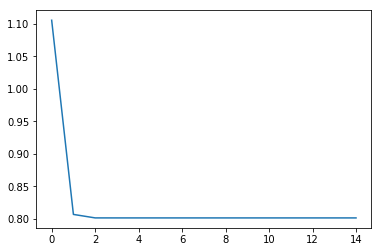

In [4]:
average_loss_history = model.train(learning_rate = 5e-2, reg = 0.2, num_epochs = 1500, 
                                   batch_size = "all", num_average = 100, decay = 0.95)
show_plot(average_loss_history)